In [ ]:
## Network testing


In [ ]:
# Imports
from gpkit import Variable, VectorVariable, Model, SignomialsEnabled, SignomialEquality
from gpkit.constraints.bounded import Bounded
from gpkit.tools import te_exp_minus1
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from math import factorial
from relaxed_constants import relaxed_constants, post_process
from drawNetwork import drawNetwork
from MST import MST
from flow import Flow
from flowElems import Node,Edge
from genData import *
from solveNetworkGP import *
from solveNetworkLP import *
from gpkit.interactive.sankey import Sankey

In [ ]:
# Generating Data
N=5
xRange = (-1, 1)
yRange = (-1, 1)
points, euclidianDistances, edgeCosts, sources, sinks = genData(xRange,yRange,N)
print points, euclidianDistances, edgeCosts, sources, sinks
np.savetxt('5points.csv',   (points),             delimiter=',')

In [2]:
# Data
N = 5
points = np.genfromtxt('5points.csv',delimiter=',')
pointDict = {str(i):points[i-1,:] for i in range(1,N+1)}
edgeCosts = [[10, 140, 100, 80, 80],
             [140, 10, 90, 80, 69],
             [100, 90, 10, 50, 40],
             [80, 69, 50, 10, 70],
             [90, 100, 80, 50, 10]]
edgeMaxFlows =  3.*np.array([[1., 1., 1., 1., 1.],
                             [1., 1., 1., 1., 1.],
                             [1., 1., 1., 1., 1.],
                             [1., 1., 1., 1., 1.],
                             [1., 1., 1., 1., 1.]])
sources = [5, 0, 0, 5, 0]
sinks = [0., 2, 3, 0, 5]

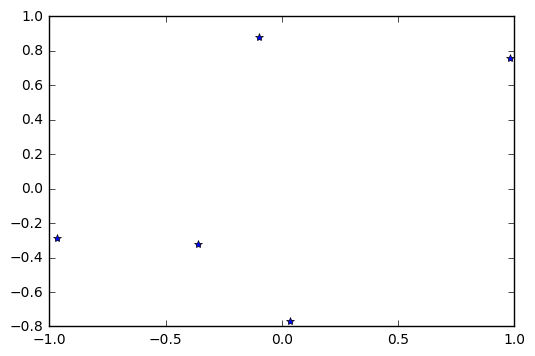

In [3]:
plt.plot(points[:,0],points[:,1],'*')
plt.show()

In [4]:
# Solving the GP
m = Flow(N)
m.substitutions.update({
    'edgeCost':       edgeCosts,
    'edgeMaxFlow':    edgeMaxFlows,
    'source'     :    sources,
    'sink'       :    sinks,
    })
m.substitutions.update({'slackCost': ['sweep',np.logspace(2,4,10)]})
m.cost = np.sum(m['edgeCost'] * m['flow']) + m['slackCost']*np.prod(m['slack'])
#m = relaxed_constants(m)
solGP = m.localsolve(verbosity=3, reltol=1e-4)
solLP = solveNetworkLP(N,edgeCosts,edgeMaxFlows,sources,sinks)


Solving over 10 passes.
Beginning signomial solve.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.187 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.208 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.163 seconds.
Solving took 3 GP solves and 0.791 seconds.








Beginning signomial solve.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.187 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.216 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.186 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.23 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.19 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.161 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.3 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.263 seconds.
Using

Solving took 0.234 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.216 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.377 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.339 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.185 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.155 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.175 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.188 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.159 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.18 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.18 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.182 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.17 seconds.
Using solver 'mosek_cli'
So

Solving took 0.2 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.194 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.171 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.19 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.199 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.254 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.181 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.447 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.209 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.226 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.208 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.204 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.446 seconds.
Using solver 'mosek_cli'
So

Solving took 0.295 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.212 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.195 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.219 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.188 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.421 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.363 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.297 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.307 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.295 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.614 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.35 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.252 seconds.
Using solver 'mosek_cli'


Solving took 0.208 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.208 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.188 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.204 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.204 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.227 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.228 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.252 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.255 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.242 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.214 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.236 seconds.
Using solver 'mosek_cli'
Solving for 55 variables.
Solving took 0.234 seconds.
Using solver 'mosek_cli'

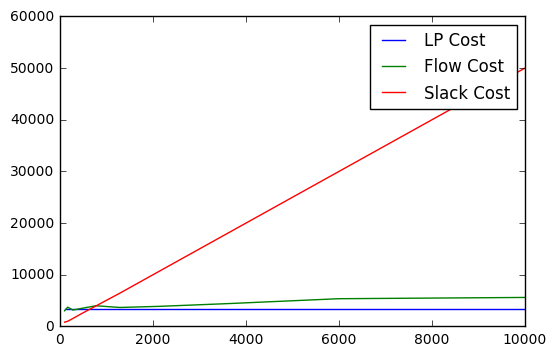

In [5]:
# Plotting algorithm solution
LPCost = np.array([sum(sum(np.dot(solLP['flow'],np.array(edgeCosts)))) for i in range(len(solGP))])
flowCost = np.array([sum(sum(np.dot(solGP('edgeCost')[i],solGP('flow')[i]))) for i in range(len(solGP))])
slackCost = np.array([solGP('slackCost')[i]*sum(solGP('slack')[i]) for i in range(len(solGP))])
slackConstant = np.round(solGP('slackCost'))
plt.plot(slackConstant,LPCost)
plt.plot(slackConstant,flowCost)
plt.plot(slackConstant,slackCost)
plt.legend(['LP Cost','Flow Cost', 'Slack Cost'])
plt.show()


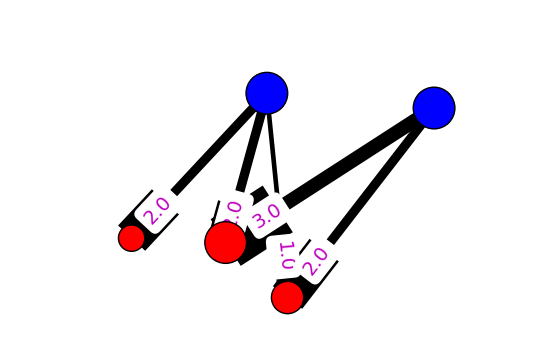

drawNetwork.py:55: RuntimeWarning: divide by zero encountered in divide
  edge_alphas = edge_weights / max(edge_weights)
drawNetwork.py:55: RuntimeWarning: invalid value encountered in divide
  edge_alphas = edge_weights / max(edge_weights)


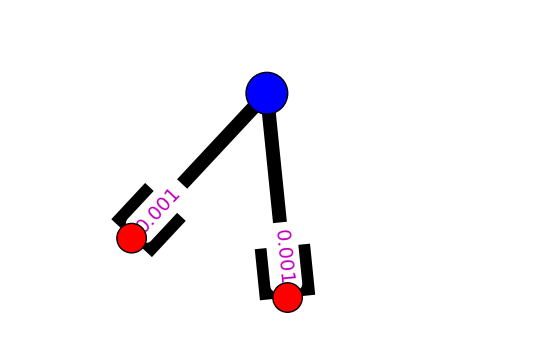

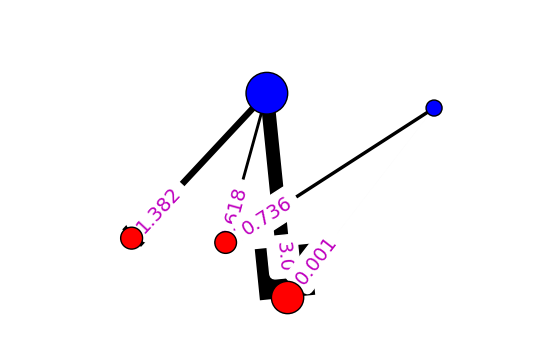

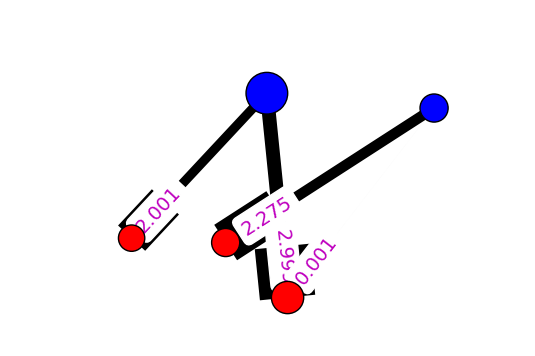

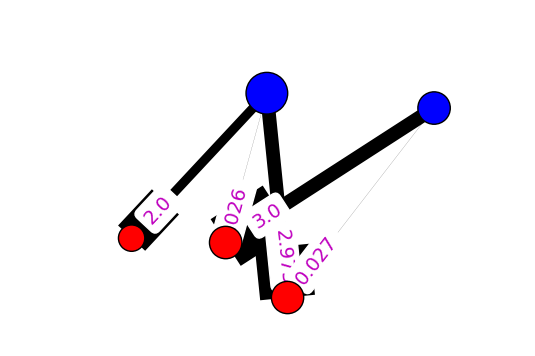

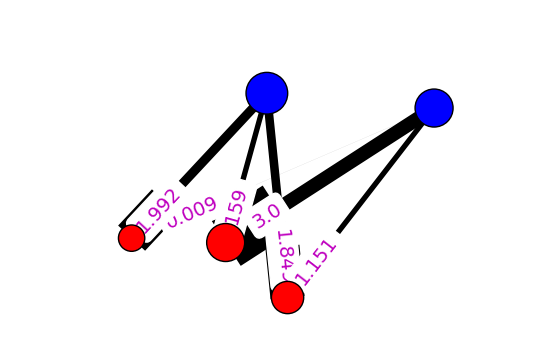

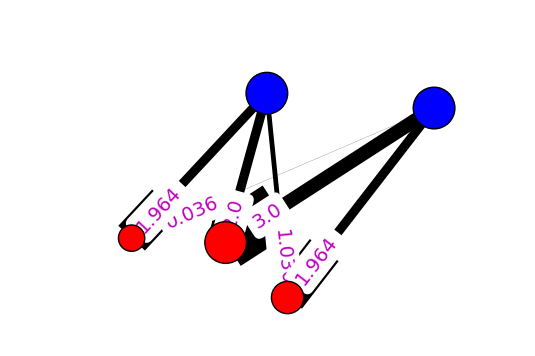

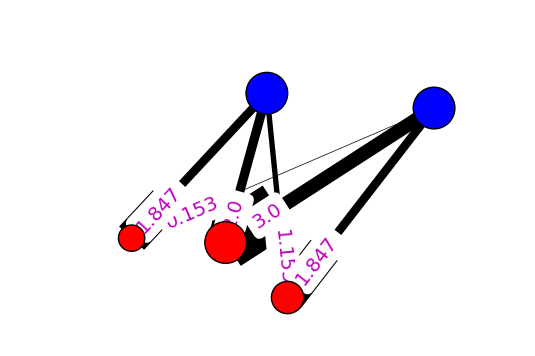

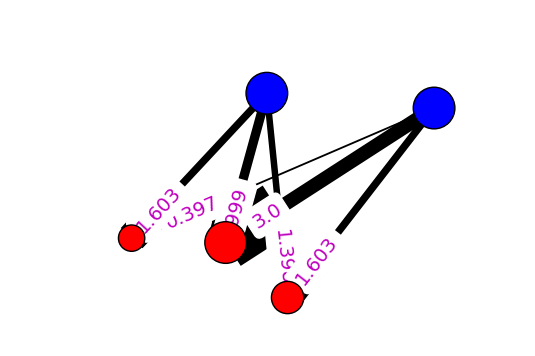

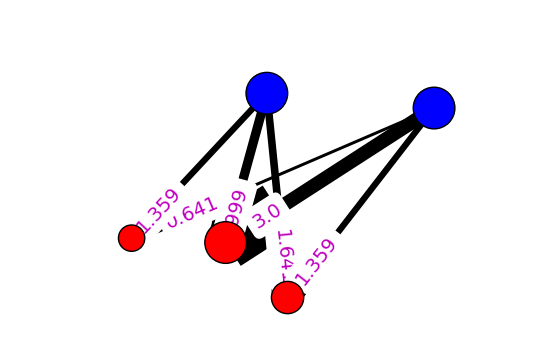

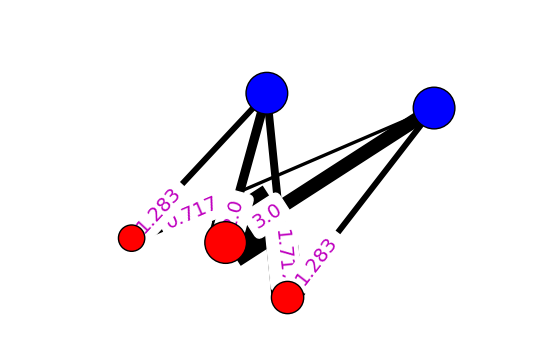

In [6]:
g = drawNetwork(solLP,points = pointDict)
for i in range(len(solGP)):
    g = drawNetwork({'flow':solGP('flow')[i]}, points = pointDict)

In [ ]:
# Printing relative costs and slack
print 'Flow Cost: ' + str(np.round(sum(sum(solGP('edgeCost')*solGP('flow'))),3))
print 'Slack Cost: ' + str(solGP('slackCost')*np.prod(solGP('slack')))
print 'Slack: ' + str(solGP('slack'))
print 'Connectivity: ' + str(np.round(solGP('connectivity'),3))